### Day36.YOLO 細節理解-網絡架構      
用實際的影像，嘗試自己搭建一個 1乘1和 3乘 3的模型    
看通過 1乘1和 3乘3 卷積層後會有甚麼變化?     
大家可以自己嘗試著搭建不同層數後，觀察圖形特徵的變化     

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [3]:
#宣告
import cv2
import matplotlib.patches as patches
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential 
from keras.layers import Activation
from keras.layers import Conv2D, MaxPooling2D


Using TensorFlow backend.


In [4]:
# print working directory
!pwd

/content


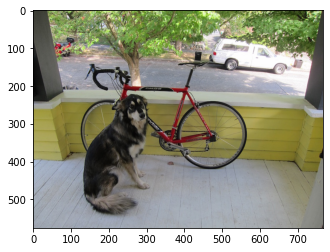

In [5]:
##讀入照片
# 下載圖片範例，如果已經下載過就可以註解掉
#!wget https://github.com/pjreddie/darknet/blob/master/data/dog.jpg?raw=true -O dog.jpg
data_path = './drive/My Drive/cv/day32/'
image=cv2.imread(data_path + 'dog.jpg' , cv2.IMREAD_COLOR)
#ax.imshow(image)

def show(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # plt.imshow 預設圖片是 rgb 的
    plt.show()
show(image)

In [18]:
# create model
#Sequential 是一個多層模型
#透過 add() 函式將一層一層 layer 加上去
#data_format='channels_last' 尺寸為 (batch, rows, cols, channels)
#搭建一個 3 個 1*1 的 filters
model=Sequential()

###加入data_format = 'channels_last' 最後輸出圖片才能顯示RGB
model.add(Conv2D(filters = 3 , kernel_size = (1,1) , padding = "same", data_format='channels_last',
                 activation='relu',input_shape=image.shape))
#作業: 接續搭建一個 4 個 3*3 的 filters 
model.add(Conv2D(filters = 4 , kernel_size = (3,3) , padding = "same", data_format ='channels_last',
                 activation='relu'))


print(model.summary())
#權重都是亂數值

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 576, 768, 3)       12        
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 576, 768, 4)       112       
Total params: 124
Trainable params: 124
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
# keras 在讀取檔案時是以 batch 的方式一次讀取多張，
#但我們這裡只需要判讀一張，
#所以透過 expand_dims() 函式來多擴張一個維度
image_batch=np.expand_dims(image,axis=0)
print(image_batch.shape)

(1, 576, 768, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(576, 768, 4)


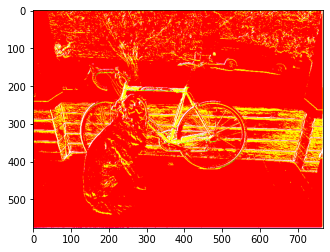

In [20]:
#model.predict() 函式，得到回傳便是 feature map
image_conv=model.predict(image_batch)
# Remove single-dimensional entries from the shape of an array.
img=np.squeeze(image_conv,axis=0)
print(img.shape)
plt.imshow(img)

#### 由於權重都是亂數值，所以每次跑出來的結果不同
大家可以自己嘗試著搭建不同層數後，觀察圖形特徵的變化